In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import operator
import plotly

In [3]:
data1=pd.read_csv("./userRank.csv")
data2=pd.read_csv("./competitionSet.csv")
data3=pd.read_csv("./userGameGrade.csv")
data4=pd.read_csv("./categoryCode.csv")
data5=pd.read_csv("./rankTable.csv")
data6=pd.read_csv("./User.csv")
data7=pd.read_csv("./Relationship.csv")
    

In [28]:
data1

,RANK_ID,_ID,GRADE,POINTS,WINRECORD,GAMECOUNT
0,1,1,A0,1810,67,100
1,2,2,A+,1920,70,90
2,3,3,B-,1200,23,80
3,4,4,C+,950,10,70
4,5,5,B-,1300,17,60
5,6,6,A+,1920,45,50
6,7,7,A+,1910,35,40
7,8,8,A+,1910,32,40
8,9,9,A+,1910,32,40
9,10,10,A+,1910,32,40


In [29]:
data2

,ROOMNUM_ID,ROOMNAME,OWNER_ID,STARTDATE,DUEDATE,CATEGORYCODE,SETTINGMONEY,RECENTPAYAVGMIN,RECENTPAYAVGMAX,Unnamed: 9
0,1,간식 값 좀 줄여보자,1,2020-01-23,2020. 2. 23.,0,10000,300000,400000,NaN
1,2,커피값 10만원이 말이되?,2,2020. 1. 23.,2020. 2. 24.,2,30000,500000,600000,NaN
2,3,걸어다녀도 되지않니?,2,2020. 1. 23.,2020. 2. 25.,9,30000,300000,400000,NaN
3,4,코인노래방좀 그만가자,1,2020. 1. 24.,2020. 2. 26.,4,10000,500000,600000,NaN
4,5,유류비 줄이기,3,2020-01-27,2020. 2. 27.,12,50000,800000,900000,NaN
5,6,담배값 줄여나가서 금연 ㄱ?,1,2020-01-28,2020. 2. 28.,10,36000,700000,900000,NaN
6,7,1주일 1디저트!,4,2020-01-29,2020. 2. 29.,3,40000,400000,500000,NaN
7,8,영화 중독탈피!,5,2020-01-30,2020. 3. 1.,8,36000,400000,500000,NaN
8,9,1주 저비용,6,2020-01-31,2020. 2. 14.,0,50000,400000,600000,NaN
9,10,2주 10만원으로 살기,7,2020-02-01,2020. 2. 15.,0,100000,400000,500000,NaN


In [31]:
#특정user_id의 승을 알아내서 
#전체 1등/전적 pie graph 뽑아내기

thisplayer=int(input('플레이어 id:'))
#여기에서 나중에 1등 추출해온 값을 가져와서 넣으면 분석가능
record=(data1[data1['_ID']==thisplayer])
upper=int(record['WINRECORD'])
lower=int(record['GAMECOUNT'])-int(record['WINRECORD'])

플레이어 id:2


## 

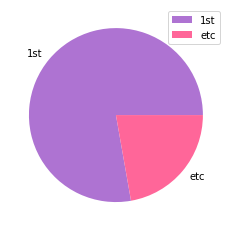

In [32]:
#1등 비율
forpiegraph=[upper,lower]
categories=["1st","etc"]

plt.pie(forpiegraph,labels=categories,colors=["#AE73D2","#FF6699"])
plt.legend(categories)


plt.show()

plt.savefig('graph.png')

In [33]:
data3.head()

,USERGAMEGRADE_ID,ROOMNUM_ID,_ID,GRADEDATE,GAMEGRADE
0,1,1,1,2020-01-23,3
1,2,1,2,2020. 1. 23.,2
2,3,1,3,2020-01-23,1
3,4,1,4,2020. 1. 23.,4
4,5,2,2,2020. 1. 23.,2


In [34]:
#1.아이디를 받아서 1등을 한 횟수 구하기
#data3에서

takefirstrecord=(data3[data3['_ID']==thisplayer])
this=(takefirstrecord[takefirstrecord["GAMEGRADE"]==1])

In [35]:
#1등 횟수 추출 성공
int(this["GAMEGRADE"])

1

In [36]:
#roomnum_ID타고 가서 categoricode꺼내와서 모스트 추출하기
takedata1=data3[data3["_ID"]==thisplayer]
takedatalist=[]
for i in takedata1["ROOMNUM_ID"]:
    takedatalist.append(i)
takedata1    

,USERGAMEGRADE_ID,ROOMNUM_ID,_ID,GRADEDATE,GAMEGRADE
1,2,1,2,2020. 1. 23.,2
4,5,2,2,2020. 1. 23.,2
9,10,3,2,2020. 1. 24.,2
28,29,8,2,2020. 1. 26.,1
65,66,17,2,2020. 1. 28.,4
76,77,20,2,20.1.29.,2
92,93,24,2,20.1.30.,2
106,107,27,2,20.1.30.,2


In [37]:
takedatalist

#for i in data2.ROOMNUM_ID:
    


#이 둘을 비교해서 타고 들어가야함

[1, 2, 3, 8, 17, 20, 24, 27]

In [38]:
codearr=[]
for i in takedatalist:
    if i==data2["ROOMNUM_ID"][i-1]:
        codearr.append(data2["CATEGORYCODE"][i-1])

    #이것을 시각화!
    

In [39]:
codearr
codecnt=dict()

for w in codearr:
    if w not in codecnt.keys():
        codecnt[w]=1
    else:
        codecnt[w]+=1
scodecnt=sorted(codecnt.items(),key=operator.itemgetter(1))

#가장많이 플레이한 코드

fst=scodecnt[len(scodecnt)-1]
del scodecnt[len(scodecnt)-1]

snd=scodecnt[len(scodecnt)-1]
del scodecnt[len(scodecnt)-1]

trd=scodecnt[len(scodecnt)-1]
del scodecnt[len(scodecnt)-1]

In [40]:
#얘 안옮겼음,,

print(fst[0])
print(snd[0])
print(trd[0])

showlist=[fst,snd,trd]
showlist[0][1]

10
3
5


2

In [41]:
# for i in showlist:
#     if data4['CATEGORYCODE'] == i:
#         print(data4['CATEGORYCODE'])


In [42]:
#가장 많이한 카테고리

for i in range(3):
    val=showlist[i][0]
    print('가장많이 참여한 내기',i+1,'순위:',data4.iloc[val].loc['CATEGORY'])

가장많이 참여한 내기 1 순위: Cvs
가장많이 참여한 내기 2 순위: Dessert
가장많이 참여한 내기 3 순위: Culture


In [43]:
data5

,RANK,MAX,MIN
0,A+,2000,1900
1,A0,1900,1750
2,A-,1750,1500
3,B+,1500,1400
4,B0,1400,1250
5,B-,1250,1000
6,C+,1000,900
7,C0,900,750
8,C-,750,500


In [44]:
data1.head()

,RANK_ID,_ID,GRADE,POINTS,WINRECORD,GAMECOUNT
0,1,1,A0,1810,67,100
1,2,2,A+,1920,70,90
2,3,3,B-,1200,23,80
3,4,4,C+,950,10,70
4,5,5,B-,1300,17,60


In [45]:
thisPlayerGrade=data1.loc[thisplayer-1,'GRADE']
thisPlayerPoint=data1.loc[thisplayer-1,'POINTS']

In [46]:
#6-1 도넛 그래프 등급

targetPoint=data5[data5['RANK']==thisPlayerGrade]['MAX']
gap=data5[data5['RANK']==thisPlayerGrade]['MAX']-data5[data5['RANK']==thisPlayerGrade]['MIN']
print(int(targetPoint-thisPlayerPoint))
print(int(gap))

80
100


In [47]:
#6-2 현재순위




orddf

,RANK_ID,_ID,GRADE,POINTS,WINRECORD,GAMECOUNT
0,12,12,A+,1925,27,30
1,2,2,A+,1920,70,90
2,6,6,A+,1920,45,50
3,9,9,A+,1910,32,40
4,10,10,A+,1910,32,40
5,7,7,A+,1910,35,40
6,8,8,A+,1910,32,40
7,11,11,A+,1910,32,40
8,23,23,A0,1850,5,7
9,1,1,A0,1810,67,100


In [48]:
#전체중 해당 플레이어 순위 추출

orddf=data1.sort_values(by='POINTS',ascending=False)
#재정렬
orddf=orddf.reset_index(drop=True)

In [49]:
AllRank=orddf[orddf['_ID']==thisplayer].index[0]+1

In [50]:
orddf

,RANK_ID,_ID,GRADE,POINTS,WINRECORD,GAMECOUNT
0,12,12,A+,1925,27,30
1,2,2,A+,1920,70,90
2,6,6,A+,1920,45,50
3,9,9,A+,1910,32,40
4,10,10,A+,1910,32,40
5,7,7,A+,1910,35,40
6,8,8,A+,1910,32,40
7,11,11,A+,1910,32,40
8,23,23,A0,1850,5,7
9,1,1,A0,1810,67,100


In [51]:
AllRank

2

In [57]:
data5

,RANK,MAX,MIN
0,A+,2000,1900
1,A0,1900,1750
2,A-,1750,1500
3,B+,1500,1400
4,B0,1400,1250
5,B-,1250,1000
6,C+,1000,900
7,C0,900,750
8,C-,750,500


In [6]:
data5.loc[3]

RANK      B+
MAX     1500
MIN     1400
Name: 3, dtype: object

In [9]:
data5[data5['MIN']==1900]

,RANK,MAX,MIN
0,A+,2000,1900
